In [1]:
import pickle

with open('pickled_data', 'rb') as read:
    all_data = pickle.load(read)

all_samples = all_data['matrix'].T
sample_ids = all_data['ids']

In [2]:
import numpy as np

mean_vector = np.mean(all_samples, axis=1)
print(np.shape(mean_vector))

(8,)


In [3]:
scatter_matrix = np.zeros((8,8))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(8,1) - mean_vector).dot(
        (all_samples[:,i].reshape(8,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[  21215.40130393   23227.62246949   25144.23082337    4457.743596
    21319.13143789   21033.39513023   20896.59163415   21110.42924118]
 [  23227.62246949   40233.74885578   38422.16892633  -32439.6888071
    23882.01301056   23027.72215775   22461.06306938   23230.09955453]
 [  25144.23082337   38422.16892633   59696.99597695  -72474.72430959
    26119.56812111   24158.81944461   23990.84036851   25162.97170312]
 [   4457.743596    -32439.6888071   -72474.72430959  485799.56933002
     3215.80734768    6755.31421507    8429.82654968    5260.62701601]
 [  21319.13143789   23882.01301056   26119.56812111    3215.80734768
    21858.27716534   21213.89996193   21015.81070009   21249.78847288]
 [  21033.39513023   23027.72215775   24158.81944461    6755.31421507
    21213.89996193   21047.23674937   20848.39167509   21006.18727777]
 [  20896.59163415   22461.06306938   23990.84036851    8429.82654968
    21015.81070009   20848.39167509   20766.71194366   20881.71783737]

In [32]:
all_samples.shape[1]

253

In [4]:
cov_mat = np.cov(all_samples)
np.shape(cov_mat)

(8, 8)

In [5]:
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,8).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,8).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[  3.96409399e-03]
 [  8.36452969e-02]
 [  1.69028237e-01]
 [ -9.82010654e-01]
 [  6.84406271e-03]
 [ -9.07925202e-04]
 [ -4.34454444e-03]
 [  2.39596094e-03]]
Eigenvalue 1 from scatter matrix: 501027.6882545287
Eigenvalue 1 from covariance matrix: 169.85323717650604
Scaling factor:  2949.7682622
----------------------------------------
Eigenvector 2: 
[[ 0.34546313]
 [ 0.4192151 ]
 [ 0.46290709]
 [ 0.11824593]
 [ 0.35111585]
 [ 0.3430014 ]
 [ 0.34079202]
 [ 0.3457996 ]]
Eigenvalue 2 from scatter matrix: 168916.43471445036
Eigenvalue 2 from covariance matrix: 10.679223459527327
Scaling factor:  15817.2956446
----------------------------------------
Eigenvector 3: 
[[-0.25216456]
 [ 0.10188785]
 [ 0.8065945 ]
 [ 0.14580525]
 [-0.21982687]
 [-0.28178721]
 [-0.26324591]
 [-0.23906431]]
Eigenvalue 3 from scatter matrix: 12742.280096579832
Eigenvalue 3 from covariance matrix: 4.449445173128753
Scaling factor:  2863.79078756
----------------------------------------
Eigenvect

In [6]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,8).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv),
                                         eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i])
             for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

501027.688255
168916.434714
12742.2800966
8571.98370087
325.360308488
98.5629929824
83.5167625188
41.1931588811


In [8]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(8,1),
                      eig_pairs[1][1].reshape(8,1),
                      eig_pairs[2][1].reshape(8,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[  3.96409399e-03   3.45463128e-01  -2.52164557e-01]
 [  8.36452969e-02   4.19215096e-01   1.01887845e-01]
 [  1.69028237e-01   4.62907087e-01   8.06594502e-01]
 [ -9.82010654e-01   1.18245931e-01   1.45805251e-01]
 [  6.84406271e-03   3.51115848e-01  -2.19826872e-01]
 [ -9.07925202e-04   3.43001397e-01  -2.81787211e-01]
 [ -4.34454444e-03   3.40792016e-01  -2.63245913e-01]
 [  2.39596094e-03   3.45799601e-01  -2.39064311e-01]]


In [9]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (3,253), "The matrix is not 3x253 dimensional."

In [56]:
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

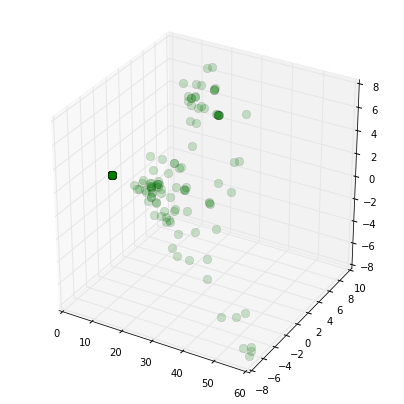

In [57]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(transformed[0,:], transformed[1,:], transformed[2,:],
        'o', markersize=8, color='green', alpha=0.2)
plt.show()

In [10]:
import plotly

In [11]:
import plotly.plotly as py

# (*) Useful Python/Plotly tools
import plotly.tools as tls

# (*) Graph objects to piece together plots
from plotly.graph_objs import *


In [12]:
fig = Figure(data=transformed)

PlotlyDictValueError: 'data' has invalid value inside 'figure'

Path To Error: ['data']

Current path: []
Current parent object_names: []

Additionally:

    role: object

